## BALTIMORE CITY ANALYSIS

We have the Data about a city called Baltimore. Let us analyse and answer some formulated questions.
1. Remove the dollar signs in the AnnualSalary field and assign it as a float
2. Group the data on JobTitle and AnnualSalary, and aggregate with sum, mean, etc.
3. How many employees are there for each JobRoles and Graph it
4. List All the Agency ID and Agency Name
5. Find all the missing Gross data in the dataset

In [13]:
#importing required libraries
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Baltimore.csv')

In [14]:
#acquiring information from dataset

df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,39686.95


In [5]:
df.isnull().any(axis=0)

 Name           False
JobTitle        False
AgencyID        False
Agency          False
HireDate         True
AnnualSalary    False
GrossPay         True
dtype: bool

We have two columns which has null values.

### 1.Remove the dollar signs in the AnnualSalary field and assign it as a float

In [6]:
#solving the first question.
df['AnnualSalary']

0        $11310.00
1         53428.00
2         68300.00
3         62000.00
4         43999.00
           ...    
18976     11310.00
18977    $11310.00
18978     43999.00
18979     44104.00
18980    $53568.00
Name: AnnualSalary, Length: 18981, dtype: object

The data in AnnualSalary column is not in a numerical format as it has "$" dollar sign at the begining. Let us first clean the data of this column.

In [10]:
df["AnnualSalary"] = df['AnnualSalary'].str.replace("$","",regex = True)
df["AnnualSalary"] = df['AnnualSalary'].astype(float)

In [12]:
df["AnnualSalary"].dtype

dtype('float64')

### 2. Group the data on JobTitle and AnnualSalary, and aggregate with sum, mean, etc.

In [17]:
#grouping the columns and finding sum and mean

grouped = df.groupby(['JobTitle','AnnualSalary'])
aggregated = grouped.agg([np.sum,np.mean])

In [18]:
aggregated

GrossPay              
                                                sum          mean
JobTitle                    AnnualSalary                         
911 LEAD OPERATOR           46010.0        66443.78  66443.780000
                            47350.0        63648.99  63648.990000
                            48690.0       179842.10  59947.366667
911 OPERATOR                35606.0       231346.85  28918.356250
                            37207.0       511421.86  42618.488333
...                                             ...           ...
ZONING APPEALS ADVISOR BMZA 59274.0        59286.87  59286.870000
ZONING ENFORCEMENT OFFICER  62000.0        61667.38  61667.380000
ZONING EXAMINER I           41202.0        40763.12  40763.120000
                            46146.0        46182.65  46182.650000
ZONING EXAMINER II          53568.0        53614.34  53614.340000

[3782 rows x 2 columns]

Aggregated contains aggregated sum and mean of Jobtitles with the Annual Salary.

### 3. How many employees are there for each JobRoles? Graph it.

In [24]:
#Finding number of Employees for each Jobrole 
df['JobTitle'].value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
LEAD SYSTEMS ANALYST SAO             1
PERMITS AND RECORDS TECHNICIAN       1
NOSOLOGIST                           1
EMERGENCY MEDICAL SUPPLY COORD       1
SUPT TRAFFIC SIGNS AND MARKING       1
Name: JobTitle, Length: 1075, dtype: int64

<AxesSubplot:>

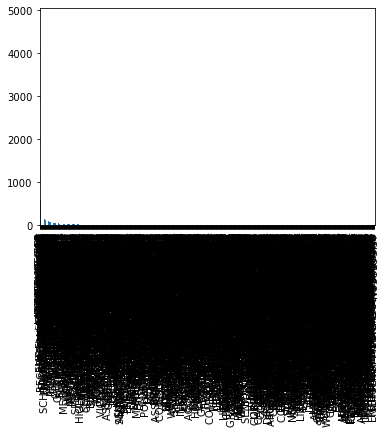

In [26]:
df['JobTitle'].value_counts().plot(kind='bar')

<AxesSubplot:>

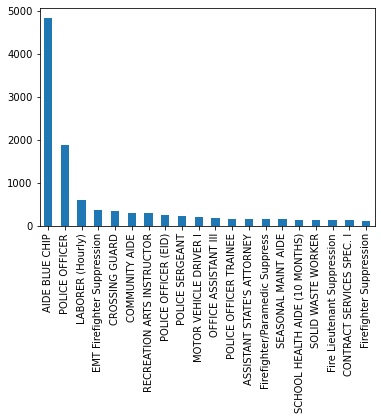

In [27]:
#let us plot for a clearer amount of data
df['JobTitle'].value_counts()[0:20].plot(kind='bar')

We can infer that AIDE BLUE CHIP is the JobTitle which has the highest Annual Salary. 
The second highest being a Police Officer. 

### 4. List All the Agency ID and Agency Name

In [51]:
#List all Agency ID and Agency Name

agency_data = df[['AgencyID','Agency']]
agency_data.shape

(18981, 2)

In [47]:
agency_data.drop_duplicates(inplace = True)
#here we get error as we are trying to change the original dataset

<ipython-input-47-0d0e6e0e613f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agency_data.drop_duplicates(inplace = True)


In [48]:
agency_data.shape

(1177, 2)

We can see that the duplicate values are dropped

In [52]:
#we can also view the same result using the line of code below.
agency_data.value_counts()

AgencyID  Agency                 
P04001    R&P-Recreation (part-ti    316
C90786    TRANS-Crossing Guards      276
W02629    Youth Summer               193
P04002    R&P-Recreation (part-ti    191
A99416    Police Department          166
                                    ... 
W02106    Youth Summer                 1
W02107    Youth Summer                 1
W02108    Youth Summer                 1
W02447    Youth Summer                 1
W02526    Youth Summer                 1
Length: 1177, dtype: int64

### 5. Find all the missing Gross data in the dataset

In [35]:
#counting Nan Values in Grosspay

Nan_entry = df['GrossPay'].isnull().sum()

In [36]:
Nan_entry

3223

There are 3223 NAN values. in the grosspay column.